## **What is Unsupervised Learning**

Unsupervised learning cannot be directly applied to a regression or classification problem because unlike supervised learning, we have the input data but no corresponding output data. The goal of unsupervised learning is to find the underlying structure of dataset, group that data according to similarities, and represent that dataset in a compressed format.

## **Clustering**

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.

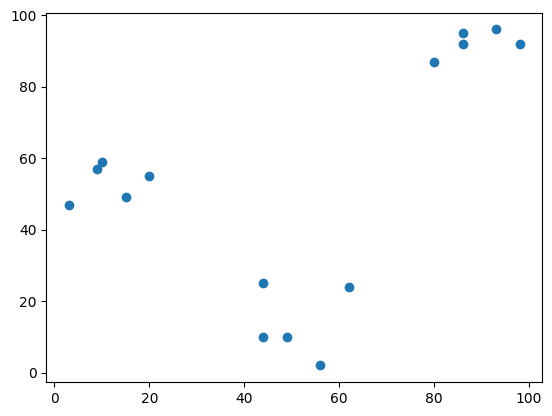

In [ ]:
from matplotlib import pyplot as plt

x_coordinates = [80, 93, 86, 98, 86, 9, 15, 3, 10, 20, 44, 56, 49, 62, 44]
y_coordinates = [87, 96, 95, 92, 92, 57, 49, 47, 59, 55, 25, 2, 10, 24, 10]

plt.scatter(x_coordinates, y_coordinates)
plt.show()


**Hierarchical Clustering Example**

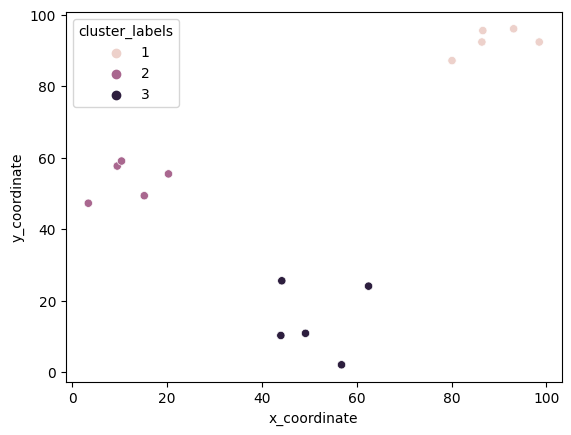

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates,'y_coordinate': y_coordinates})

Z = linkage(df, 'ward')
df['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')

sns.scatterplot(x='x_coordinate', y='y_coordinate',
                hue='cluster_labels', data = df)
plt.show()


**K-means Clustering Example**

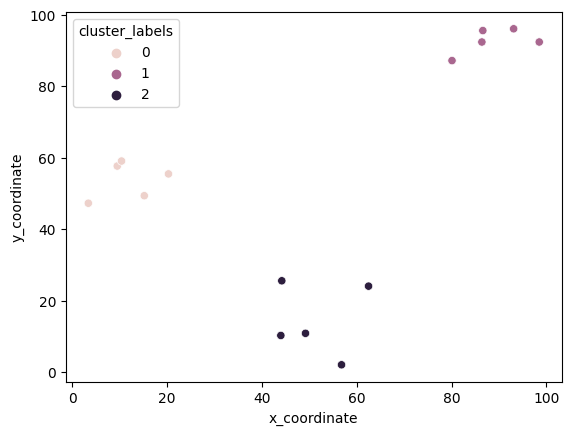

In [ ]:
from scipy.cluster.vq import kmeans, vq
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates,'y_coordinate': y_coordinates})

centroids,_ = kmeans(df, 3)
df['cluster_labels'], _ = vq(df, centroids)

sns.scatterplot(x='x_coordinate', y='y_coordinate',
                hue='cluster_labels', data = df)
plt.show()


**Normalization of data**

Normalization: process of rescaling data to a standard deviation of 1

x_new = x/std_dev(x)

[2.72733941 0.54546788 1.63640365 1.63640365 1.09093577 1.63640365
 1.63640365 4.36374306 0.54546788 1.09093577 1.09093577 1.63640365
 2.72733941]


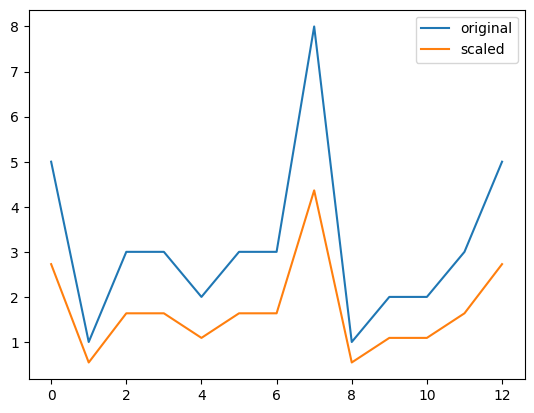

In [ ]:
from scipy.cluster.vq import whiten
data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]
scaled_data = whiten(data)

print(scaled_data)

# Import plotting library
from matplotlib import pyplot as plt

# Initialize original, scaled data
plt.plot(data,
         label="original")

plt.plot(scaled_data,
         label="scaled")

# Show legend and display plot
plt.legend()
plt.show()


## **Hierarchical Clustering**

Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. It's a part of unsupervised learning in machine learning and data mining. Here's a basic overview of how it works:

1. Strategy: There are two primary strategies in hierarchical clustering - Agglomerative and Divisive.

  - Agglomerative (Bottom-Up): This is the more common approach. Each data point starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
  - Divisive (Top-Down): This starts with all data points in one cluster and iteratively splits the most heterogeneous cluster.
2. Distance Measures: To determine the similarity or dissimilarity between clusters, different distance measures can be used. Common ones include Euclidean distance, Manhattan distance, and cosine similarity. The choice of distance metric can significantly affect the results of hierarchical clustering.

3. Dendrogram: The process of hierarchical clustering can be visually represented using a tree-like diagram called a dendrogram. This diagram shows the arrangement of the clusters produced by the corresponding analyses and helps in understanding the data's hierarchical structure.

4. Determining Number of Clusters: In hierarchical clustering, you can decide the number of clusters by setting a threshold on the dendrogram. This is more flexible compared to partitioning methods like K-Means, where the number of clusters needs to be specified beforehand.

5. Application: Hierarchical clustering is used in various fields like bioinformatics for gene expression analysis, in image processing, and in organizing and clustering documents in information retrieval systems.



---



The `scipy.cluster.hierarchy.linkage` function in Python's SciPy library is a key tool for performing hierarchical clustering. Here's a breakdown of the parameters and what the function returns:

### Parameters:

1. **observations**: This parameter represents the input data for clustering. It can be in the form of a 1D or 2D array. In a 2D array, each row represents a single observation, and each column represents a feature of the observation. For 1D array inputs, the array represents distances between pairs of observations in a condensed form.

2. **method**: This parameter specifies the linkage algorithm to use for clustering. The options include:
   - `'single'` (nearest point algorithm)
   - `'complete'` (farthest point algorithm)
   - `'average'` (mean of the distances)
   - `'centroid'` (distance between centroids)
   - `'ward'` (minimizes the variance of the clusters being merged)
   - Other methods are also available. The choice of method affects how the distance between clusters is computed.

3. **metric**: This parameter defines the distance metric to use for computing the distances between observations. The default is `'euclidean'`, which is suitable for most cases. Other metrics like `'cityblock'` (Manhattan distance), `'cosine'` similarity, etc., can also be used.

4. **optimal_ordering**: When set to `True`, this parameter attempts to order the dendrogram in a way that minimizes the crossing of dendrogram branches. This can make the dendrogram easier to interpret, especially for large datasets, but comes at the cost of additional computational complexity.

### Return Value:

- The function returns an array of shape \([n-1, 4]\), where \(n\) is the number of observations. This array describes the hierarchy of the clusters formed by the linkage method. Each row of the array has the format \([idx1, idx2, dist, sample_count]\):
  - `idx1` and `idx2` are the indices of the clusters being merged in each step. For the first \(n\) steps, these indices correspond to the observations themselves. Later steps refer to the clusters formed in previous steps.
  - `dist` is the distance between the two clusters being merged.
  - `sample_count` is the number of original observations in the newly formed cluster.

This hierarchical clustering linkage array can then be used to create dendrograms or to form flat clusters using functions like `fcluster`. The structure of this array is central to understanding and interpreting the hierarchical clustering process.

In [ ]:
scipy.cluster.hierarchy.linkage(observations, method='single',
                                metric='euclidean', optimal_ordering=False)

In [ ]:
"""
  distance_matrix: output of linkage() method
  num_clusters: number of clusters
  criterion: how to decide thresholds to form clusters
"""

scipy.cluster.hierarchy.fcluster(distance_matrix,
                                 num_clusters,
                                 criterion)

**Visualize clusters with matplotlib**

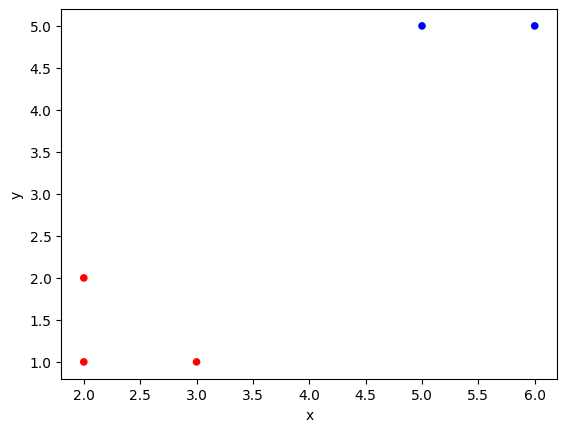

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd

df = pd.DataFrame({'x': [2, 3, 5, 6, 2],
                   'y': [1, 1, 5, 5, 2],
                   'labels': ['A', 'A', 'B', 'B', 'A']})
colors = {'A':'red', 'B':'blue'}

df.plot.scatter(x='x',
                y='y',
                c=df['labels'].apply(lambda x: colors[x]))
plt.show()


**Visualize clusters with seaborn**

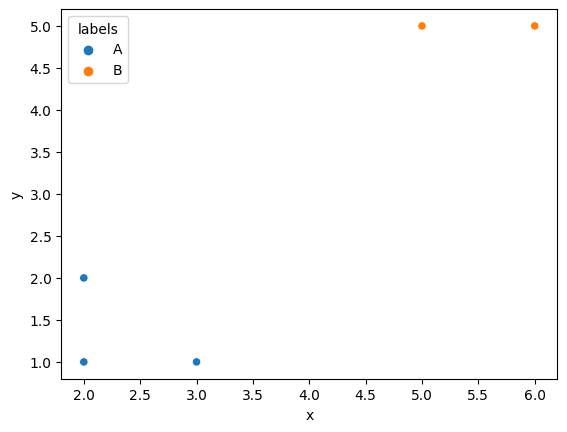

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'x': [2, 3, 5, 6, 2],
                   'y': [1, 1, 5, 5, 2],
                   'labels': ['A', 'A', 'B', 'B', 'A']})

sns.scatterplot(x='x',
                y='y',
                data=df, hue ="labels")
plt.show()


**Dendrogram**

A dendrogram is a tree-like diagram that illustrates the arrangement of the clusters formed during the hierarchical clustering process. Here's how to interpret it:

1. Branches and Nodes: Each branch represents a cluster. The branching points, or nodes, show where individual clusters are merged into larger clusters. The height of each node indicates the distance at which the clusters merged, representing the dissimilarity or distance between them.

2. Vertical Axis: This axis represents the distance or dissimilarity measure between clusters. As you move up the dendrogram, the distance increases, indicating that clusters are less similar to each other.

3. Horizontal Axis: This axis lists individual data points or initial clusters at the bottom of the hierarchy. Each data point starts as its own cluster.

4. Cluster Formation: As you move up the dendrogram, individual clusters merge with each other, forming larger clusters. The height at which two branches merge represents the distance or dissimilarity between these clusters.

5. Interpreting Clusters: To determine the number of clusters, a horizontal line is drawn at a chosen distance, and the number of vertical lines it intersects gives the number of clusters. This line can be adjusted depending on the desired granularity of clustering.

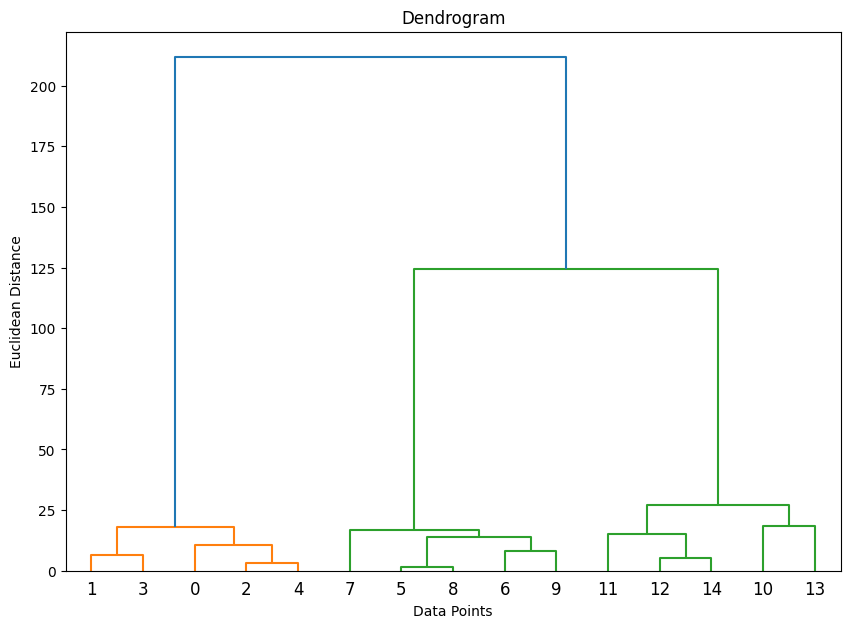

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import seaborn as sns
import pandas as pd

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({"x": x_coordinates, "y": y_coordinates})

Z = linkage(df, 'ward')  # 'ward' is one method of clustering
# df['cluster'] = fcluster(Z, 3, criterion="maxclust")
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


## **K-Means Clustering**

K-means clustering is a popular method in data analysis and machine learning used for partitioning data into distinct groups, or clusters. The goal of this method is to divide data points into groups such that the points in each group are more similar to each other than to those in other groups.

**Why k-means clustering?**
- A critical drawback of hierarchical clustering is runtime
- K means run significantly faster on large datasets

In [ ]:
kmeans(obs, k_or_guess, iter, thresh, check_finite=)

**Parameters**

- `obs`: This is the main data to be clustered. It should be a M by N array of M observations in N dimensions. Each row of the array is a data point.

- `k_or_guess`: This can either be the number of clusters to form (an integer) or an initial guess of the cluster centroids (an array of centroids).

- `iter (optional)`: The number of iterations to perform. It's an optional argument that specifies the number of times to run the algorithm with different centroid seeds. The final results will be the best output of these runs in terms of inertia.

- `thresh (optional)`: This is the threshold (a float) to determine convergence. If the centroids do not move more than this threshold, the algorithm stops.

- `check_finite (optional)`: A boolean to check whether to check the input array for NaNs and Infs. The default is True.

**Return Values**

- `codebook`: An array of k centroids. Each centroid is the mean of the points in that cluster.

- `distortion`: The mean (average) Euclidean distance between the observations passed and the centroids generated. Lower distortion means the clusters are more compact.

In [ ]:
# Generate cluster label
vq(obs, code_book, check_finite=True)

**Parameters**

- `obs`: This is the array of observations (data points) to be assigned to the clusters. It should be a M by N array, where M is the number of observations and N is the number of dimensions for each observation.

- `code_book`: This is an array of centroids. These centroids are usually obtained from a previous run of K-means clustering. The code_book size is K by N, where K is the number of centroids (clusters).

- `check_finite (optional)`: A boolean parameter that checks whether the input array contains only finite numbers (no NaNs or infs). The default is True.

**Return Values**

- `code`: An array of indices indicating the closest centroid in the code_book for each observation in obs. This array is of the same length as the number of observations in obs.

- `dist`: An array of distances of each observation to its nearest centroid. The length of this array is also equal to the number of observations in obs.

In [ ]:
from scipy.cluster.vq import kmeans, vq
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates,'y_coordinate': y_coordinates})

centroids,_ = kmeans(df, 3)
df['cluster_labels'], _ = vq(df, centroids)

sns.scatterplot(x='x_coordinate', y='y_coordinate',
                hue='cluster_labels', data = df)
plt.show()


| Limitations | K-means Clustering | Hierarchical Clustering |
|-------------|--------------------|-------------------------|
| **Parameters** | Must specify number of clusters (\( k \)) in advance. | Decision on when to stop combining clusters is subjective. |
| **Initial Conditions** | Sensitive to initial centroids. | N/A |
| **Cluster Assumptions** | Assumes spherical, similarly sized clusters. | N/A |
| **Density Handling** | Struggles with varying densities. | N/A |
| **Outliers** | Sensitive to outliers. | Sensitive to noise and outliers. |
| **Data Scaling** | Sensitive to scale of data. | Requires appropriate distance metric. |
| **Data Type** | Best for numeric data. | N/A |
| **Computational Complexity** | Efficient but varies with cluster number. | Computationally expensive for large datasets. |
| **Irreversibility** | N/A | Decisions to combine clusters are final. |
| **Linkage Sensitivity** | N/A | Sensitive to linkage criteria choice. |
| **Scalability** | Good for large datasets. | Not ideal for very large datasets. |




---



## **Dominant color in image**

**Tools to find dominant colors**

- Convert image to pixels: matplotlib.image.imread
- Display colors of  cluster center: matplotlib.pyplot.impshow

In [ ]:
# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
batman_image = img.imread('batman.jpg')
print(batman_image.shape)

r, g, b = [], [], []
# Store RGB values of all pixels in lists r, g and b
for pixel in batman_image:
    for temp_r, temp_g, temp_b in pixel:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


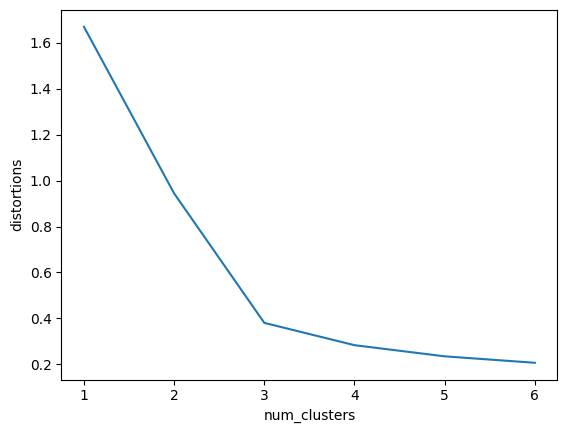

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.vq import kmeans, whiten

batman_df = pd.DataFrame({'red': r, 'blue': b, 'green': g})
batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])
batman_df['scaled_green'] = whiten(batman_df['green'])

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

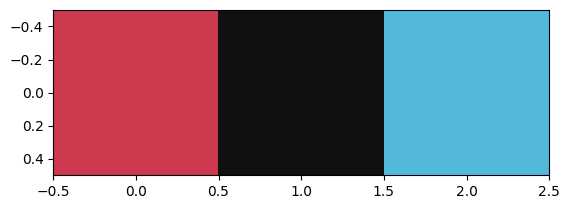

In [ ]:
# Get standard deviations of each color
cluster_centers, _ = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], 3)

r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

colors = []
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()